# EDA & modelization

## Loading main packages 

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
stacking = 'True'

In [4]:
data_size = 'large'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.5/dataset/concrete_miss.csv')

In [6]:
target_col = 'Strength'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

### Dataset Information

In [11]:
df.shape

(1030, 9)

Some records

In [12]:
display(df)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,NaN,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Dataframe structure

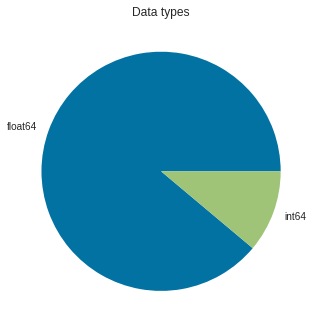

In [13]:
plot_dataframe_structure(df)

### Dataframe statistics

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Cement,988.0,280.736063,104.520393,102.000000,192.000000,272.800000,350.000000,540.000000
BlastFurnaceSlag,973.0,73.633515,86.586068,0.000000,0.000000,22.000000,142.500000,359.400000
FlyAsh,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
CoarseAggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


Which columns could be categorical ?

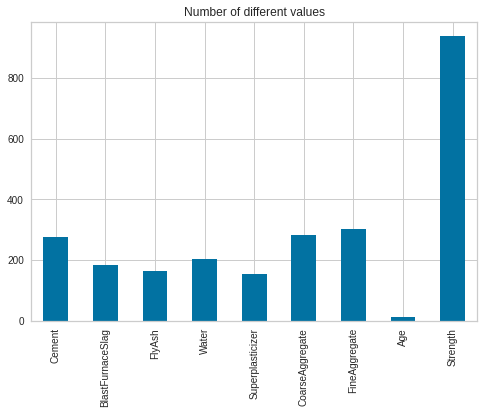

In [15]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [16]:
duplicates(df)

Number of rows before removing: 988
Number of duplicate rows: 21
Number of rows after removing: 967


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,NaN,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


#### Drop user's columns:

In [17]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [18]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [19]:
df, drop_cols = drop_na(df, threshold_NaN)

Drop columns containing more than 50.0 % of NaN: []


Final set of dropped columns

In [20]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [21]:
display(dropped_cols)

array([], dtype=object)

#### Encoding data:

In [22]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: Cement
Encoding numeric column: BlastFurnaceSlag
Encoding numeric column: FlyAsh
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: CoarseAggregate
Encoding numeric column: FineAggregate
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


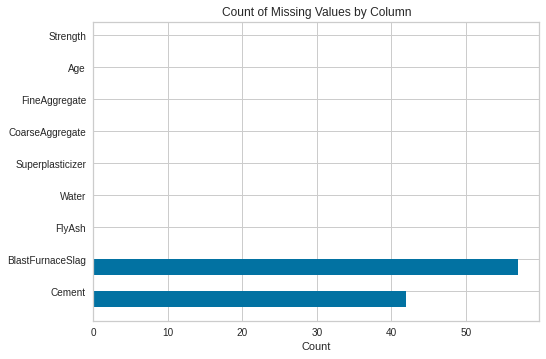

In [23]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [24]:
df = imputation(df)

Imputing NaN using IterativeImputer


#### Data compression:

In [25]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.07MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


Dataframe structure after compression

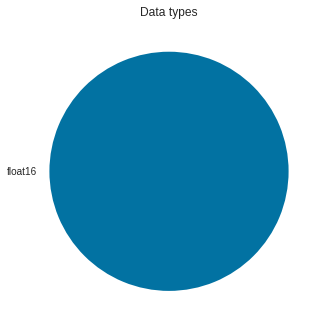

In [26]:
plot_dataframe_structure(df)

#### Outliers:

In [27]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


#### Splitting dataframe in features and targets

In [28]:
y = df[target_col]

In [29]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

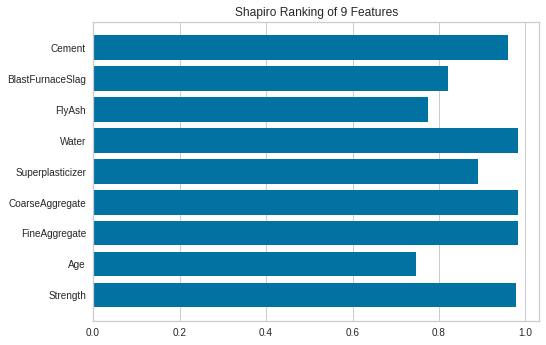

In [30]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

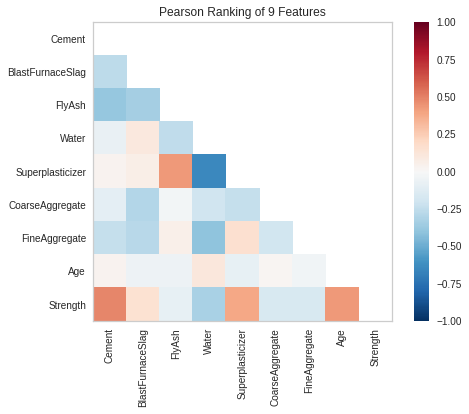

In [31]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

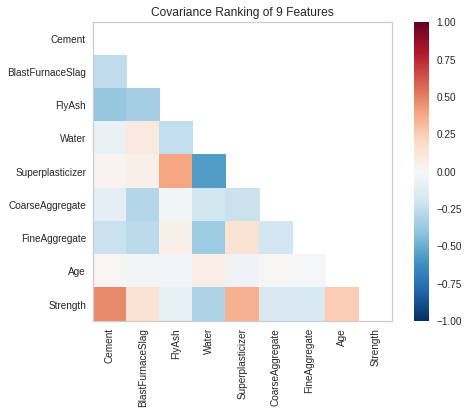

In [32]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

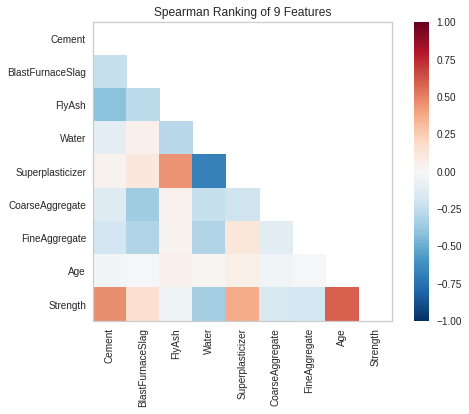

In [33]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

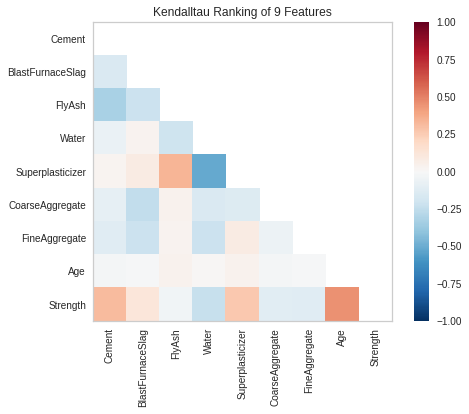

In [34]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

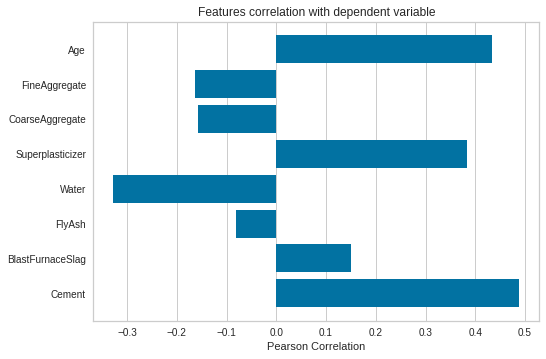

In [35]:
feature_correlation(X, y);

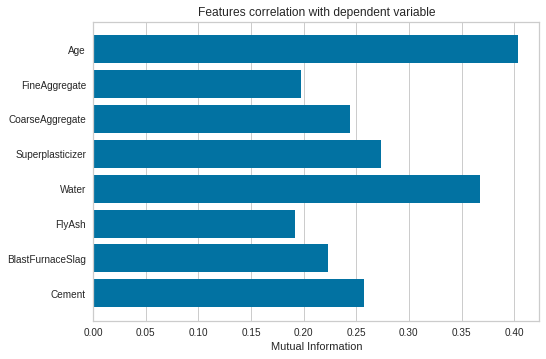

In [36]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

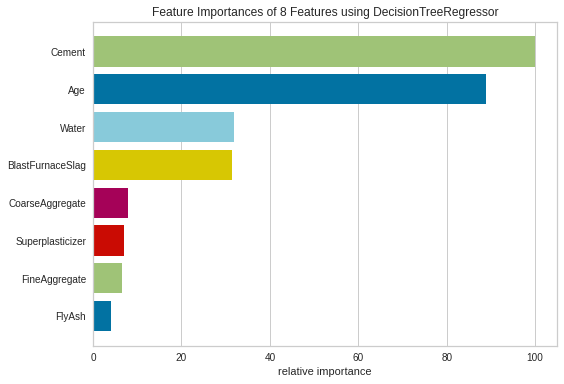

In [37]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

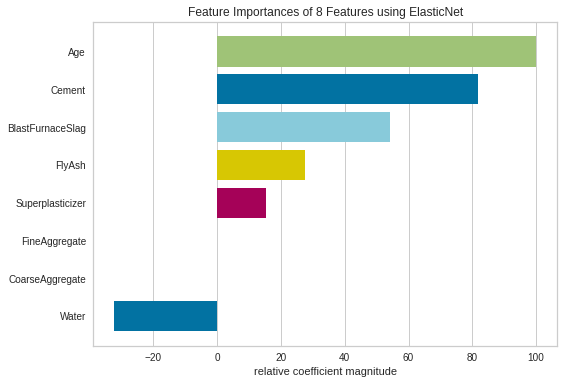

In [38]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

## Splitting data in train and test sets 

In [39]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modeling

### Building the model

Level-0 models

In [40]:
level_0 = [ 
          ( 'RFR' , RandomForestRegressor(max_depth=5, n_estimators=10, max_features='auto') ), 
          ( 'ABR' , AdaBoostRegressor() ), 
          ( 'SGDR' , SGDRegressor(loss='squared_loss') ), 
          ( 'ELNE' , ElasticNet(alpha=0.01, l1_ratio=0.5) ), 
          ( 'SVRL' , SVR(kernel='linear') ), 
          ( 'SVRP' , SVR(kernel='poly') ), 
          ( 'SVRG' , SVR(kernel='rbf') ), 
          ]

Level-1 model

In [41]:
level_1 = MLPRegressor()

Stacking for regression

In [42]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [43]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 3.35 s, sys: 1.23 s, total: 4.59 s
Wall time: 2.71 s


StackingRegressor(estimators=[('RFR',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=10)),
                              ('ABR', AdaBoostRegressor()),
                              ('SGDR', SGDRegressor()),
                              ('ELNE', ElasticNet(alpha=0.01)),
                              ('SVRL', SVR(kernel='linear')),
                              ('SVRP', SVR(kernel='poly')), ('SVRG', SVR())],
                  final_estimator=MLPRegressor())

### Model evaluation

#### Model scoring

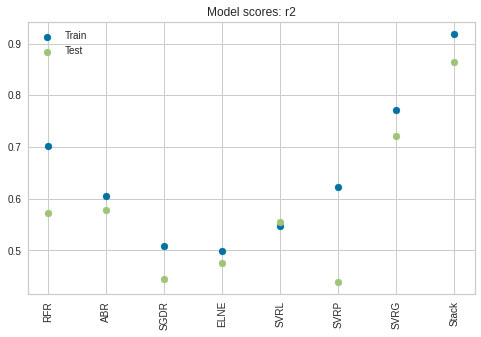

array([['RFR', 0.702799327038593, 0.5729834273998504],
       ['ABR', 0.6048115255074333, 0.5779904108212546],
       ['SGDR', 0.5077522221431368, 0.4444630496959202],
       ['ELNE', 0.49925728397025004, 0.4764631201662983],
       ['SVRL', 0.5478325580318537, 0.5547673383637124],
       ['SVRP', 0.6227319892816274, 0.43995155660818597],
       ['SVRG', 0.7723925358935676, 0.7214188518343434],
       ['Stack', 0.9174840012354493, 0.8640115586532431]], dtype=object)

In [44]:
score_stacking_r(model, X_train, y_train, X_test, y_test)

#### Feature permutation importance (a posteriori)

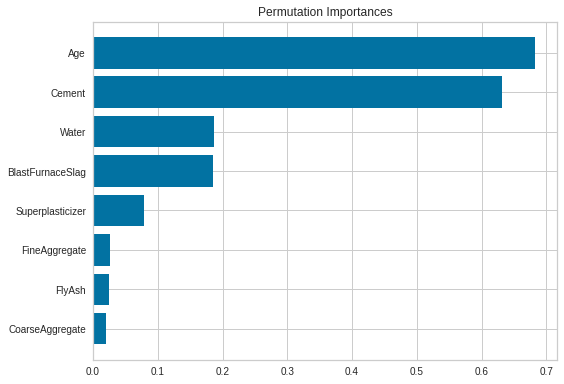

In [45]:
plot_perm_imp(model, X, y, scoring = 'r2');

#### Residuals plot

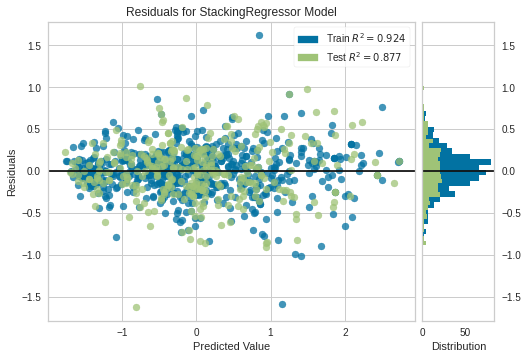

In [46]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

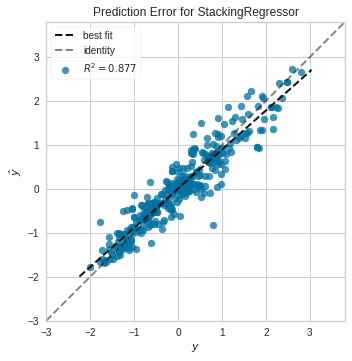

In [47]:
prediction_error(model, X_train, y_train, X_test, y_test);